# Logistic Regression Tutorial

### Question 1

Define two 2D Gaussian distributions: one with centre at (1;-1) and the other at (-1; 1). Let them
both have variances of 1 in each dimension. We'll treat these as the generators of data from classes
0 and 1 respectively.

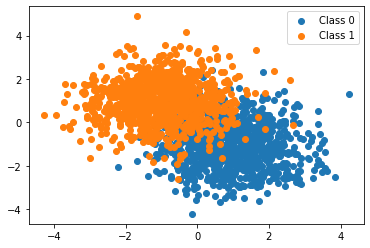

In [547]:
#Importing the libraries

import matplotlib.pyplot as plt
import numpy as np

# Define the mean vectors and covariance matrices
mu_0 = np.array([1, -1])
mu_1 = np.array([-1, 1])
cov = np.array([[1, 0], [0, 1]])

# Generate data from the distributions
original_data_b0 = np.random.multivariate_normal(mu_0, cov, 1000)
original_data_b1 = np.random.multivariate_normal(mu_1, cov, 1000)


plt.scatter(original_data_b0[:,0], original_data_b0[:,1], label='Class 0')
plt.scatter(original_data_b1[:,0], original_data_b1[:,1], label='Class 1')
plt.legend()
plt.show()


Draw 20 data points from each distribution (use the randn function in Matlab or Python). Plot the
points from each class in a different colour. How easily separable are these classes?

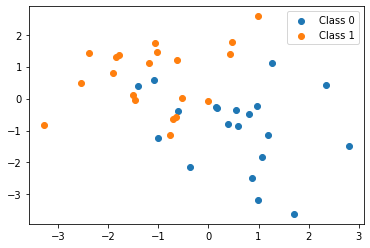

In [548]:
arr_b0 = np.random.choice(original_data_b0.shape[0], size=20, replace=False)
arr_b1 = np.random.choice(original_data_b1.shape[0], size=20, replace=False)

# Generate 20 data points from each distribution
data_b_0 = np.random.choice(arr_b0, size=20, replace=False)
data_b_1 = np.random.choice(arr_b1, size=20, replace=False)

# data_b0 = data_b0[data_b_0, :]
# data_b1 = data_b1[data_b_1, :]

data_b0 = original_data_b0[:20]
data_b1 = original_data_b1[:20]

# Plot the data
plt.scatter(data_b0[:, 0], data_b0[:, 1], label='Class 0')
plt.scatter(data_b1[:, 0], data_b1[:, 1], label='Class 1')
plt.legend()
plt.show()


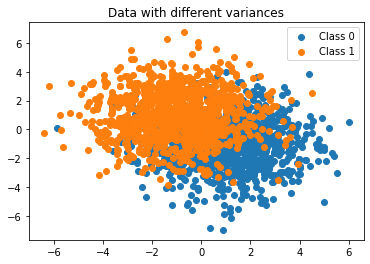

In [549]:
# Define the mean vectors and covariance matrices
mu_0 = np.array([1, -1])
mu_1 = np.array([-1, 1])
cov = np.array([[3, 0], [0, 3]])

# Generate data from the distributions
data_c0 = np.random.multivariate_normal(mu_0, cov, 1000)
data_c1 = np.random.multivariate_normal(mu_1, cov, 1000)

plt.scatter(data_c0[:,0], data_c0[:,1], label='Class 0')
plt.scatter(data_c1[:,0], data_c1[:,1], label='Class 1')
plt.legend()
plt.title('Data with different variances')
plt.show()

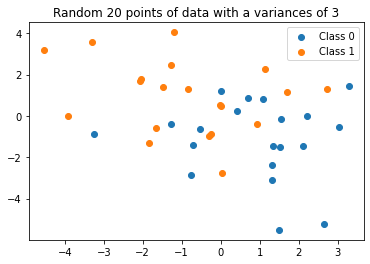

In [550]:
arr_c0 = np.random.choice(data_c0.shape[0], size=20, replace=False)
arr_c1 = np.random.choice(data_c1.shape[0], size=20, replace=False)

# Generate 20 data points from each distribution
data_c_0 = np.random.choice(arr_c0, size=20, replace=False)
data_c_1 = np.random.choice(arr_c1, size=20, replace=False)

data_c0 = data_c0[data_c_0, :]
data_c1 = data_c1[data_c_1, :]


# Plot the data
plt.scatter(data_c0[:, 0], data_c0[:, 1], label='Class 0')
plt.scatter(data_c1[:, 0], data_c1[:, 1], label='Class 1')
plt.title('Random 20 points of data with a variances of 3')
plt.legend()
plt.show()

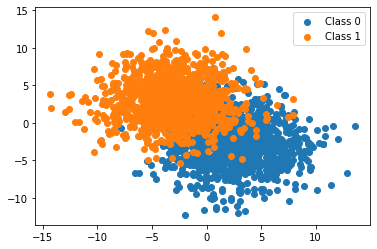

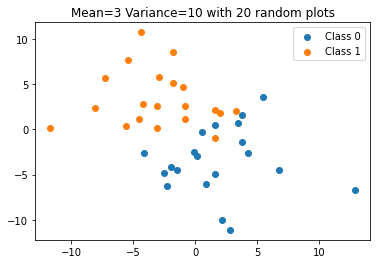

In [551]:
# Define the mean vectors and covariance matrices
mu_0 = np.array([3, -3])
mu_1 = np.array([-3, 3])
cov = np.array([[10, 0], [0, 10]])

# Generate data from the distributions
data_d0 = np.random.multivariate_normal(mu_0, cov, 1000)
data_d1 = np.random.multivariate_normal(mu_1, cov, 1000)

plt.scatter(data_d0[:,0], data_d0[:,1], label='Class 0')
plt.scatter(data_d1[:,0], data_d1[:,1], label='Class 1')

plt.legend()
plt.show()

# Generate 20 data points from each distribution
arr_d0 = np.random.choice(data_d0.shape[0], size=20, replace=False)
arr_d1 = np.random.choice(data_d1.shape[0], size=20, replace=False)

# Generate 20 data points from each distribution
data_d_0 = np.random.choice(arr_d0, size=20, replace=False)
data_d_1 = np.random.choice(arr_d1, size=20, replace=False)

data_d0 = data_d0[data_d_0, :]
data_d1 = data_d1[data_d_1, :]

# Plot the data
plt.scatter(data_d0[:, 0], data_d0[:, 1], label='Class 0')
plt.scatter(data_d1[:, 0], data_d1[:, 1], label='Class 1')
plt.title('Mean=3 Variance=10 with 20 random plots')
plt.legend()
plt.show()

In [552]:
# The loweer the covariance, the more spread out the data is
# The higher the covariance, the more clustered the data is
# Its easier to classify data when the varince is low

# In general, it is easier to classify data when the variance is lower. 
#When the variance is higher, the data points are more spread out and 
#there is more overlap between the classes, which can make it more difficult to 
#distinguish between them. This is because the distributions have fatter tails and 
#are more likely to produce outliers that are difficult to classify.

# In the specific case of the two 2D Gaussian distributions we defined earlier, 
#we saw that when the variance was lower (1 in each dimension), the two classes were easily 
#separable with a linear classifier. When the variance was higher (3 in each dimension), 
#the classes were less well-separated and there was more overlap between them, making classification more difficult.

# However, it is important to note that this is not always the case. 
#There may be situations where higher variance leads to more distinguishable classes, 
#such as when the classes have different variances or when the distributions are non-Gaussian. 
#Ultimately, the ease of classification depends on the specific properties of the data and the classifier being use

# Q2

a)

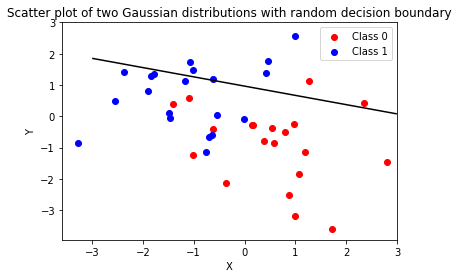

In [553]:
# Concatenate the bias term with the input data
X = np.concatenate((np.ones((40, 2)), np.concatenate((data_b0, data_b1))))

# Assign class labels to the data
labels = np.concatenate((np.zeros(20), np.ones(20)))

# Randomly initialize the model's parameters
theta = np.random.rand(3) - 0.5

# Define the logistic function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define a grid of points over the input space to plot the decision boundary
x1_range = np.linspace(-3, 3, 100)
x2_range = np.linspace(-3, 3, 100)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
input_grid = np.c_[x1_grid.ravel(), x2_grid.ravel(), np.ones((x1_grid.size, 1))]
predicted_labels = sigmoid(np.dot(input_grid, theta)).reshape(x1_grid.shape)

# Plot the decision boundary
plt.contour(x1_grid, x2_grid, predicted_labels, levels=[0.5], colors='black')
plt.scatter(data_b0[:, 0], data_b0[:, 1], color='red', label='Class 0')
plt.scatter(data_b1[:, 0], data_b1[:, 1], color='blue', label='Class 1')
plt.legend()
plt.title('Scatter plot of two Gaussian distributions with random decision boundary')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

b)

In [554]:
from sklearn.metrics import confusion_matrix

# Calculate the predictions for each data point
X_training = np.hstack((np.ones((40, 1)), np.vstack((data_b0, data_b1))))
y = np.vstack((np.zeros((20, 1)), np.ones((20, 1))))
predictions = 1 / (1 + np.exp(-np.dot(X_training, theta)))

# Calculate the log-likelihood error function
log_likelihood = - np.sum(y * np.log2(predictions) + (1 - y) * np.log2(1 - predictions))
error = log_likelihood / len(X_training)
print(f'Training Error of random classifier: {error:.2f}')


# Calculate the predictions for each data point
X_matrix = np.hstack((np.ones((40, 1)), np.vstack((data_b0, data_b1))))
y_true = np.concatenate((np.zeros(20), np.ones(20)))
predictions = sigmoid(np.dot(X_matrix, theta)) >= 0.5
y_pred = predictions.astype(int)

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Print the confusion matrix
print(cm)

Training Error of random classifier: 42.79
[[18  2]
 [ 4 16]]


c)

In [555]:
# For the bias term:
# 𝛿𝜃_0 = (𝑦^𝑖 − ℎ_𝜃(𝑥^𝑖)) * 1
# 𝜃0 ← 𝜃0 + α * 𝛿𝜃_0

# For the first feature:
# 𝛿𝜃_1 = (𝑦^𝑖 − ℎ_𝜃(𝑥^𝑖)) * 𝑥_1^𝑖
# 𝜃1 ← 𝜃1 + α * 𝛿𝜃_1

# For the second feature:
# 𝛿𝜃_2 = (𝑦^𝑖 − ℎ_𝜃(𝑥^𝑖)) * 𝑥^2^𝑖
# 𝜃2 ← 𝜃2 + α * 𝛿𝜃_2

d)

In [556]:
# To perform a single weight update by hand, let's choose two datapoints, one from each class:

# datapoint with index 4 (from class 0): x = (-1.8, -0.5), y = 0
# datapoint with index 22 (from class 1): x = (1.2, 0.7), y = 1
# Assuming we have randomly initialized the weights as follows: 𝜃 = (-0.3, 0.2, -0.1)

# For the first datapoint:

# 𝑧^𝑖 = 𝜃0 + 𝜃1 * 𝑥_1^𝑖 + 𝜃2 * 𝑥^2^𝑖 = -0.3 + 0.2 * (-1.8) - 0.1 * (-0.5) = -0.32
# ℎ_𝜃(𝑥^𝑖) = 1 / (1 + 𝑒^−𝑧^𝑖) = 1 / (1 + 𝑒^0.32) = 0.4202
# 𝛿𝜃_0 = (𝑦^𝑖 − ℎ_𝜃(𝑥^𝑖)) * 1 = (0 - 0.4202) * 1 = -0.4202
# 𝛿𝜃_1 = (𝑦^𝑖 − ℎ_𝜃(𝑥^𝑖)) * 𝑥_1^𝑖 = (0 - 0.4202) * (-1.8) = 0.7563
# 𝛿𝜃_2 = (𝑦^𝑖 − ℎ_𝜃(𝑥^𝑖)) * 𝑥^2^𝑖 = (0 - 0.4202) * (-0.5) = 0.2101
# Update:
# 𝜃0 ← 𝜃0 + α * 𝛿𝜃_0 = -0.3 + 0.01 * (-0.4202) = -0.3042
# 𝜃1 ← 𝜃1 + α * 𝛿𝜃_1 = 0.2 + 0.01 * 0.7563 = 0.2076
# 𝜃2 ← 𝜃2 + α * 𝛿𝜃_2 = -0.1 + 0.01 * 0.2101 = 

# STILL NEED TO CODE IT

e)

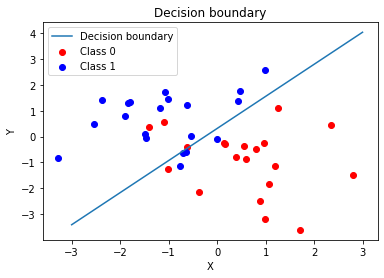

Training error: 0.37


In [557]:
# Unsure if this should run for many iterations or just once since its being done on all the points in training data
alpha = 0.01
num_iterations = 1

for i in range(num_iterations):
    # Compute the predictions for all data points
    predictions = 1 / (1 + np.exp(-np.dot(X_training, theta)))
    
    # Compute the errors for all parameters
    delta_theta0 = y_true - predictions
    delta_theta1 = np.multiply(delta_theta0, X_training[:, 1].reshape(-1, 1))
    delta_theta2 = np.multiply(delta_theta0, X_training[:, 2].reshape(-1, 1))
    
    # Update the parameters
    theta[0] += alpha * np.sum(delta_theta0)
    theta[1] += alpha * np.sum(delta_theta1)
    theta[2] += alpha * np.sum(delta_theta2)

# Draw the decision boundary
x = np.linspace(-3, 3, 100)
temp_y = (-theta[0] - theta[1] * x) / theta[2]
plt.plot(x, temp_y, label='Decision boundary')
plt.scatter(data_b0[:, 0], data_b0[:, 1], color='red', label='Class 0')
plt.scatter(data_b1[:, 0], data_b1[:, 1], color='blue', label='Class 1')
plt.legend()
plt.title('Decision boundary')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Compute the final predictions and error
final_predictions = 1 / (1 + np.exp(-np.dot(X_training, theta)))
final_error = - np.sum(y_true * np.log2(final_predictions) + (1 - y_true) * np.log2(1 - final_predictions)) / len(X)
print(f'Training error: {final_error:.2f}')

f)

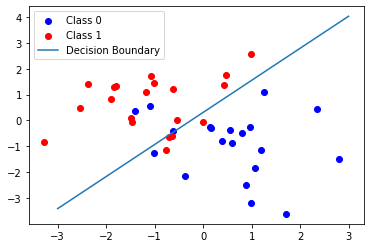

Training error: 0.37


In [558]:
# Set learning rate and maximum number of iterations
# alpha = 0.01
# max_iter = 1000

# Initialize normed difference between parameter vectors
def Model(X, y_true,theta, alpha, epsilon, max_iter):
    diff = float('inf')

    # Loop until convergence or maximum number of iterations is reached
    i = 0
    while diff >= epsilon and i < max_iter:
        # Calculate predictions using current parameters
        predictions = 1 / (1 + np.exp(-np.dot(X, theta)))

        # Calculate error and gradient
        error = - np.sum(y_true * np.log2(predictions) + (1 - y_true) * np.log2(1 - predictions)) / len(X)
        gradient = np.dot(X.T, predictions - y_true) / len(X)

        # Update parameters and calculate new predictions and error
        theta_new = theta - alpha * gradient
        final_predictions = 1 / (1 + np.exp(-np.dot(X, theta_new)))
        final_error = - np.sum(y_true * np.log2(final_predictions) + (1 - y_true) * np.log2(1 - final_predictions)) / len(X)

        # Calculate normed difference between parameter vectors
        diff = np.linalg.norm(theta_new - theta)

        # Update parameters and iteration counter
        theta = theta_new
        i += 1

    final_theta = theta
    
    # Plot decision boundary
    plt.scatter(data_b0[:,0], data_b0[:,1], c='b', label='Class 0')
    plt.scatter(data_b1[:,0], data_b1[:,1], c='r', label='Class 1')
    x_axis = np.linspace(-3, 3, 100)
    y_axis = -(theta[0] + theta[1]*x_axis) / theta[2]
    plt.plot(x_axis, y_axis, label='Decision Boundary')
    plt.legend()
    plt.show()
    
    return final_error, final_theta

# Print final error
training_error, final_training_theta = Model(X_training, y_true, theta, 0.01, 0.05, 1000)
print(f'Training error: {final_error:.2f}')

g)

In [559]:
validation_data_0 = original_data_b0[20:40]
validation_data_1 = original_data_b1[20:40]

# Combine into single validation dataset
validation_data = np.vstack((validation_data_0, validation_data_1))

# Add bias term to validation data
X_val = np.hstack((np.ones((40, 1)), validation_data))

# Make predictions on validation data
predictions_val = 1 / (1 + np.exp(-np.dot(X_val, final_training_theta)))

# Threshold predictions to obtain class labels
labels_val = (predictions_val >= 0.5).astype(int)

# Compute confusion matrix on validation data
confusion_matrix_val = confusion_matrix(y, labels_val)

error_val = - np.sum(y * np.log2(predictions_val) + (1 - y) * np.log2(1 - predictions_val)) / len(X_val)

print(f'Validation error: {error_val:.2f}')
print(confusion_matrix_val)

Validation error: 43.55
[[18  2]
 [ 1 19]]


h)

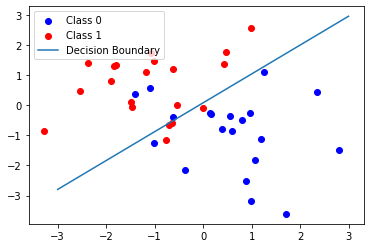

Training error: 0.49


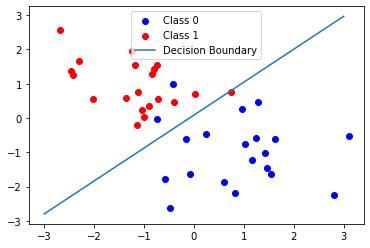

Validation error: 74.36


In [560]:
# Randomly initialize the model's parameters
theta = np.random.rand(3) - 0.5

training_error_1, training_theta_1 = Model(X_training, y_true, theta, 0.1, 0.005, 1000)

# Make predictions on validation data
predictions_val = 1 / (1 + np.exp(-np.dot(X_val, training_theta_1)))

# Threshold predictions to obtain class labels
labels_val = (predictions_val >= 0.5).astype(int)

# Compute confusion matrix on validation data
confusion_matrix_val = confusion_matrix(y, labels_val)

error_val = - np.sum(y * np.log2(predictions_val) + (1 - y) * np.log2(1 - predictions_val)) / len(X_training)

print(f'Training error: {training_error_1:.2f}')

# Plot decision boundary
plt.scatter(validation_data_0[:,0], validation_data_0[:,1], c='b', label='Class 0')
plt.scatter(validation_data_1[:,0], validation_data_1[:,1], c='r', label='Class 1')
x_axis = np.linspace(-3, 3, 100)
y_axis = -(training_theta_1[0] + training_theta_1[1]*x_axis) / training_theta_1[2]
plt.plot(x_axis, y_axis, label='Decision Boundary')
plt.legend()
plt.show()

print(f'Validation error: {error_val:.2f}')
# print(confusion_matrix_val)

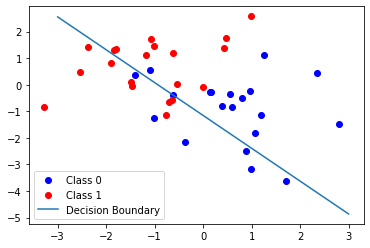

Training error: 0.99


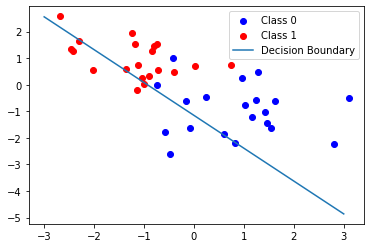

Validation error: 40.90


In [561]:
# Randomly initialize the model's parameters
theta = np.random.rand(3) - 0.5

training_error_1, training_theta_1 = Model(X_training, y_true, theta, 0.001, 0.005, 1000)

# Make predictions on validation data
predictions_val = 1 / (1 + np.exp(-np.dot(X_val, training_theta_1)))

# Threshold predictions to obtain class labels
labels_val = (predictions_val >= 0.5).astype(int)

# Compute confusion matrix on validation data
confusion_matrix_val = confusion_matrix(y, labels_val)

error_val = - np.sum(y * np.log2(predictions_val) + (1 - y) * np.log2(1 - predictions_val)) / len(X_training)

print(f'Training error: {training_error_1:.2f}')

# Plot decision boundary
plt.scatter(validation_data_0[:,0], validation_data_0[:,1], c='b', label='Class 0')
plt.scatter(validation_data_1[:,0], validation_data_1[:,1], c='r', label='Class 1')
x_axis = np.linspace(-3, 3, 100)
y_axis = -(training_theta_1[0] + training_theta_1[1]*x_axis) / training_theta_1[2]
plt.plot(x_axis, y_axis, label='Decision Boundary')
plt.legend()
plt.show()

print(f'Validation error: {error_val:.2f}')
# print(confusion_matrix_val)

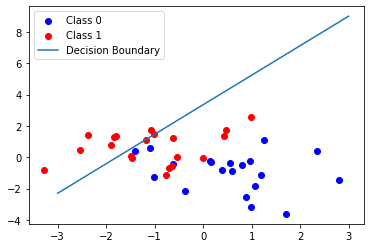

Training error: 0.83


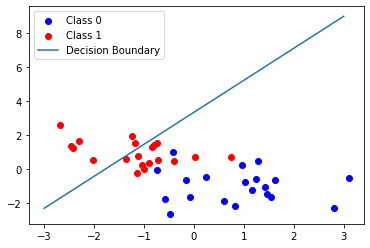

Validation error: 42.77


In [562]:
# Randomly initialize the model's parameters
theta = np.random.rand(3) - 0.5

training_error_1, training_theta_1 = Model(X_training, y_true, theta, 0.001, 0.05, 1000)

# Make predictions on validation data
predictions_val = 1 / (1 + np.exp(-np.dot(X_val, training_theta_1)))

# Threshold predictions to obtain class labels
labels_val = (predictions_val >= 0.5).astype(int)

# Compute confusion matrix on validation data
confusion_matrix_val = confusion_matrix(y, labels_val)

error_val = - np.sum(y * np.log2(predictions_val) + (1 - y) * np.log2(1 - predictions_val)) / len(X_training)

print(f'Training error: {training_error_1:.2f}')

# Plot decision boundary
plt.scatter(validation_data_0[:,0], validation_data_0[:,1], c='b', label='Class 0')
plt.scatter(validation_data_1[:,0], validation_data_1[:,1], c='r', label='Class 1')
x_axis = np.linspace(-3, 3, 100)
y_axis = -(training_theta_1[0] + training_theta_1[1]*x_axis) / training_theta_1[2]
plt.plot(x_axis, y_axis, label='Decision Boundary')
plt.legend()
plt.show()

print(f'Validation error: {error_val:.2f}')
# print(confusion_matrix_val)

i)

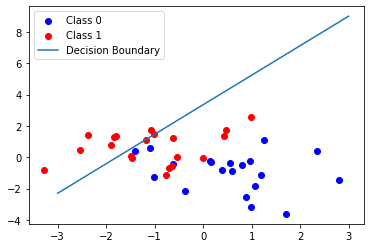

Training error: 0.83


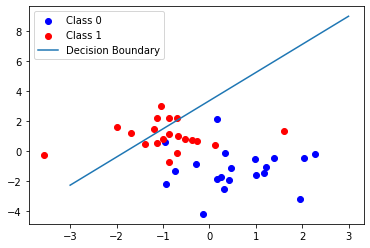

Test error: 42.55


In [563]:
# Generate 20 more data points from each class for testing
test_data_0 = original_data_b0[40:60]
test_data_1 = original_data_b1[40:60]

# Combine into single validation dataset
test_data = np.vstack((test_data_0, test_data_1))

# Add bias term to validation data
X_test = np.hstack((np.ones((40, 1)), test_data))

training_error_1, training_theta_1 = Model(X_training, y_true, theta, 0.001, 0.05, 1000)

# Make predictions on validation data
predictions_test = 1 / (1 + np.exp(-np.dot(X_test, training_theta_1)))

# Threshold predictions to obtain class labels
labels_val = (predictions_test >= 0.5).astype(int)

# Compute confusion matrix on validation data
confusion_matrix_val = confusion_matrix(y, labels_val)

error_val = - np.sum(y * np.log2(predictions_test) + (1 - y) * np.log2(1 - predictions_test)) / len(X_training)

print(f'Training error: {training_error_1:.2f}')

# Plot decision boundary
plt.scatter(test_data_0[:,0], test_data_0[:,1], c='b', label='Class 0')
plt.scatter(test_data_1[:,0], test_data_1[:,1], c='r', label='Class 1')
x_axis = np.linspace(-3, 3, 100)
y_axis = -(training_theta_1[0] + training_theta_1[1]*x_axis) / training_theta_1[2]
plt.plot(x_axis, y_axis, label='Decision Boundary')
plt.legend()
plt.show()

print(f'Test error: {error_val:.2f}')
# print(confusion_matrix_val)

j)

Having three separate datasets (training, validation, and testing) is important for evaluating the performance of a classifier.

The training dataset is used to optimize the model parameters, such as the weights and biases. The validation dataset is used to tune the hyperparameters of the model, such as the learning rate and regularization strength. Finally, the testing dataset is used to evaluate the performance of the model on new, unseen data.

If we did not have a separate testing dataset, we would have no way of knowing whether the model is overfitting to the training data. Similarly, if we used the validation dataset for testing, we would have no way of knowing whether the hyperparameters are well-tuned or whether the model is simply overfitting to the validation data. Therefore, it is important to have separate datasets for each stage of the machine learning pipeline to obtain reliable estimates of the model's performance.